# Overall Outline

Immediately thinking about this we will need a couple of important parts:

- Factor Model System to determine the covariance matrix
- Markowitz In order to take in the data and process it

In [3]:
import matplotlib.pyplot as plt
import tools as T
from strategy import *

# Exploring

In [4]:
load_object("C3_train.pkl").keys()

dict_keys(['prices', 'features'])

In [18]:
prices = load_object("C3_train.pkl")['prices']

In [19]:
features = load_object("C3_train.pkl")['features']

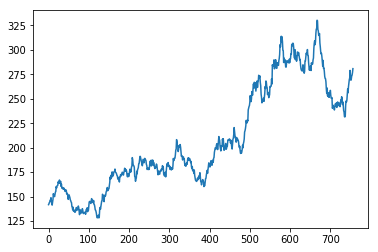

In [10]:
plt.plot(prices[:,0])

(array([ 37., 210., 160., 109.,  27.,  44.,  17.,  65.,  28.,  60.]),
 array([20.86244922, 21.92904697, 22.99564472, 24.06224247, 25.12884022,
        26.19543797, 27.26203571, 28.32863346, 29.39523121, 30.46182896,
        31.52842671]),
 <a list of 10 Patch objects>)

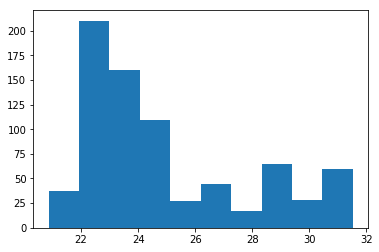

In [11]:
plt.hist(prices[:,5])

Looks like the stock price looks very lognormal

## Calculating the Covariance given a time period

In [12]:
prices.shape

(757, 680)

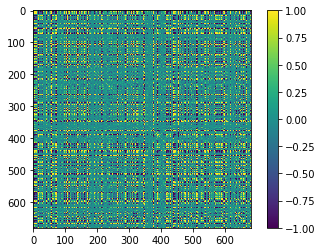

In [16]:
plt.imshow(np.cov(prices[:10,:].T));plt.colorbar();plt.clim(-1,1)

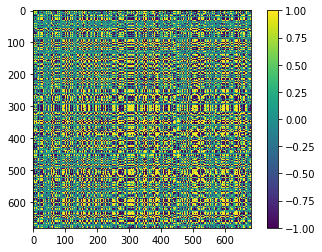

In [17]:
plt.imshow(np.cov(prices[:30,:].T));plt.colorbar();plt.clim(-1,1)

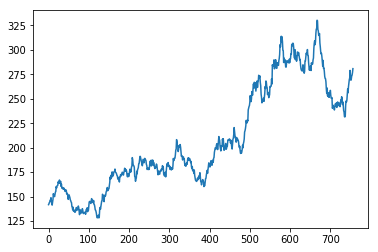

In [20]:
plt.plot(prices.T[0])

# Feature Analysis

- 'labour cost' - Updated every 21 Days, well I guess it is the cost of the labor (21)
- 'analyst projected total earnings' - Updated every day (note that for 1 it seems like there is a negative relationship" (1)
- 'weighted average outstanding shares' - Any authorized shares that are held by or sold to a corporation’s shareholders, exclusive of treasury stock which is held by the company itself, are known as outstanding shares. The weighted average of outstanding shares is a calculation that incorporates any changes in the amount of outstanding shares over a reporting period. It is an important number, as it is used to calculate key financial measures, such as earnings per share (EPS) for the time period. (1)
- 'R&D intensity index' -  R&D intensity, is generally defined as expenditures by a firm on its research and development (R&D) divided by the firm's sales (21)
- 'relative strength index' - The Relative Strength Index (RSI), developed by J. Welles Wilder, is a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between zero and 100. (14)
- 'total assets' - total assets (16)
- 'net book value' - Net book value is the amount at which an organization records an asset in its accounting records. Net book value is calculated as the original cost of an asset, minus any accumulated depreciation, accumulated depletion, accumulated amortization, and accumulated impairment (https://www.accountingtools.com/articles/2017/5/12/net-book-value) (11)
- 'analyst sentiment' - (21)
- 'market share' - Percentage of the market that it encompasses, this can be used in Barra (21)
- 'Aggregate Capital Cost' - Capital costs are fixed, one-time expenses incurred on the purchase of land, buildings, construction, and equipment used in the production of goods or in the rendering of services. In other words, it is the total cost needed to bring a project to a commercially operable status. Whether a particular cost is capital or not depend on many factors such as accounting, tax laws, and materiality. It looks not like some kind of cumulative summary. (21)

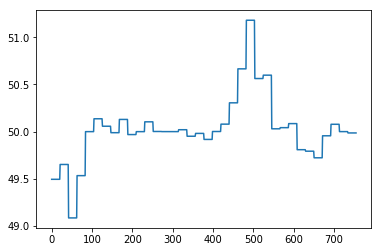

In [159]:
plt.plot(features['values'][:,0,7])

In [155]:
period = 9
np.sum(features['values'][:,0,period]==features['values'][:,0,period][0])

21

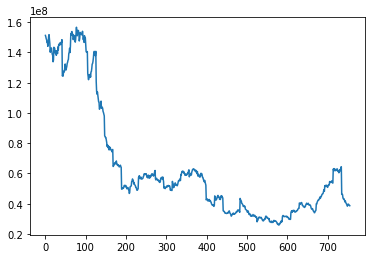

In [138]:
plt.plot(features['values'][:,0,2])

In [129]:
features['values'][:,0,4][::21]

array([65.32913045, 73.76817314, 46.88594628, 29.09223551, 46.43960187,
       62.19297798, 51.98171613, 64.39188466, 60.485721  , 62.47411159,
       56.75537769, 53.09889922, 56.03051806, 44.00286263, 55.77363769,
       71.75338462, 44.68770312, 35.53808755, 37.13378089, 61.20925446,
       66.68354252, 49.08255434, 56.85973017, 52.30098375, 78.37329516,
       57.85957968, 43.84012633, 61.38538299, 42.99411639, 48.78722268,
       38.97166587, 40.51784324, 60.08468302, 26.66126634, 40.96883078,
       33.33042036])

In [130]:
features['values'][:,0,4][::21]

array([65.32913045, 73.76817314, 46.88594628, 29.09223551, 46.43960187,
       62.19297798, 51.98171613, 64.39188466, 60.485721  , 62.47411159,
       56.75537769, 53.09889922, 56.03051806, 44.00286263, 55.77363769,
       71.75338462, 44.68770312, 35.53808755, 37.13378089, 61.20925446,
       66.68354252, 49.08255434, 56.85973017, 52.30098375, 78.37329516,
       57.85957968, 43.84012633, 61.38538299, 42.99411639, 48.78722268,
       38.97166587, 40.51784324, 60.08468302, 26.66126634, 40.96883078,
       33.33042036])

In [ ]:
for i in range(len(features['values'][:,0,4][::21])):
    

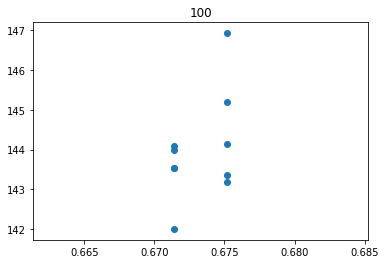

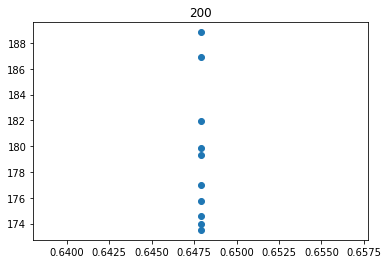

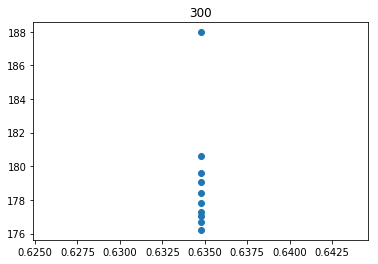

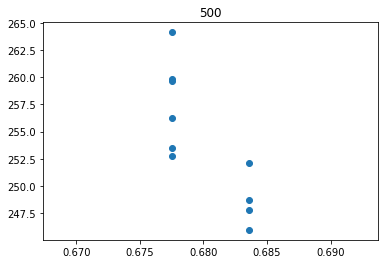

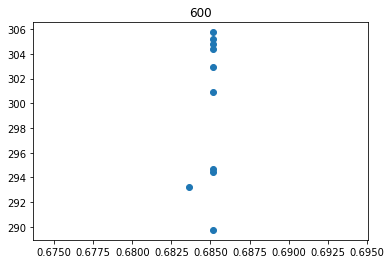

In [112]:
time_evolution = [100,200,300,500,600]

for t in time_evolution:
    returns_0=prices[:,0][1:]-prices[:,0][:-1]/prices[:,0][:-1]
    plt.figure()
    plt.title(t)
    plt.scatter(features['values'][:,0,3][t:t+10],returns_0[t:t+10])

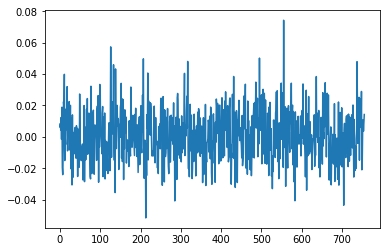

In [45]:
plt.plot((prices[:,0][1:]-prices[:,0][:-1])/prices[:,0][:-1])

In [46]:
temp = [(prices[:,0][i]-prices[:,0][i-1])/prices[:,0][i-1] for i in range(1,len(prices[:,0]))]

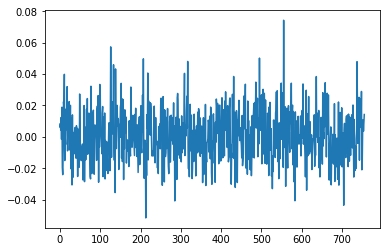

In [47]:
plt.plot(temp)

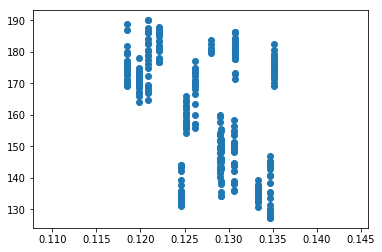

In [89]:
returns_0 = prices[:,0][1:]-prices[:,0][:-1]/prices[:,0][:-1]
drift= 0
plt.scatter(features['values'][:,0,8][:300],returns_0[drift:drift+300])

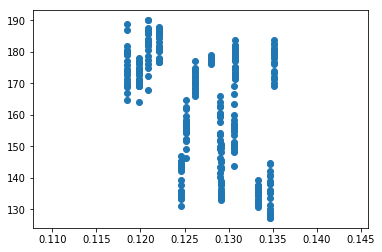

In [96]:
returns_0 = prices[:,0][1:]-prices[:,0][:-1]/prices[:,0][:-1]
drift= 7
plt.scatter(features['values'][:,0,8][:300],returns_0[drift:drift+300])

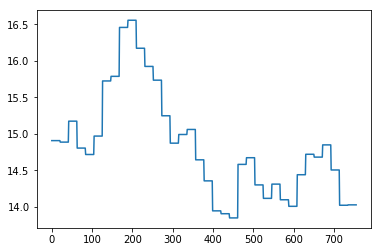

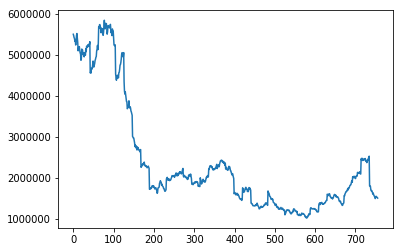

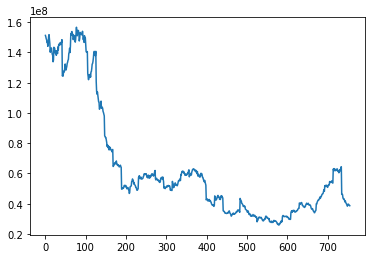

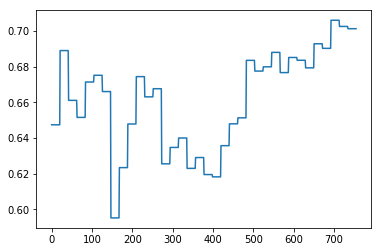

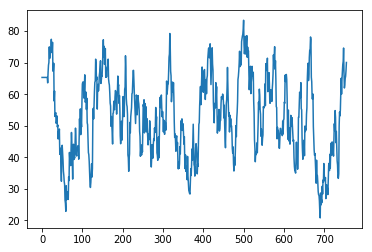

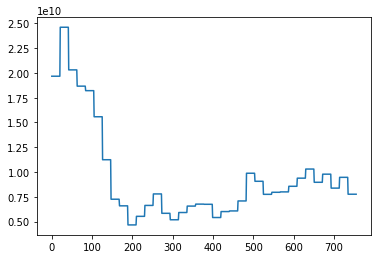

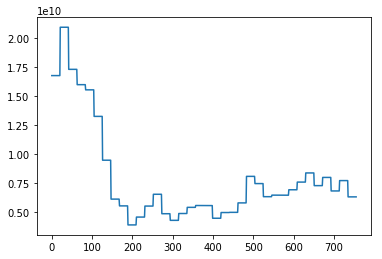

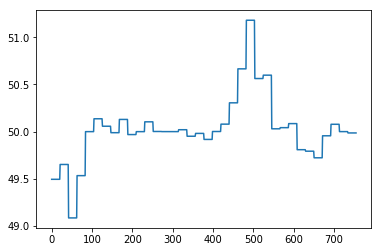

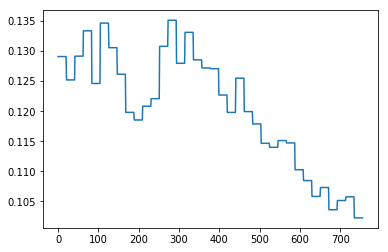

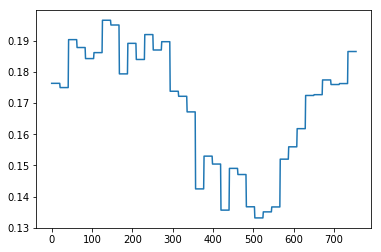

In [40]:
for i in range(10):
    plt.figure()
    plt.plot(features['values'][:,0,i])

# Attempting to use PCA

In [28]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA().fit(X)

In [31]:
print('Explained variance by component: %s' % pca.explained_variance_ratio_)
print(pd.DataFrame(pca.components_,columns=iris.feature_names))

Explained variance by component: [0.92461621 0.05301557 0.01718514 0.00518309]
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361590         -0.082269           0.856572          0.358844
1           0.656540          0.729712          -0.175767         -0.074706
2          -0.580997          0.596418           0.072524          0.549061
3           0.317255         -0.324094          -0.479719          0.751121


In [41]:
PCA.fit?

# Attempting to extract factor models

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

z_scaler = StandardScaler()
data = load_object("C3_train.pkl")['features']['values'][:,1,:]
z_data = z_scaler.fit_transform(data)
pca = PCA().fit(z_data)

We can see in this metric the majority of the variation is explained by looking at the features 4 and 6

In [92]:
print('Explained variance by component: %s' % pca.explained_variance_ratio_)
pd.DataFrame(pca.components_,columns=load_object("C3_train.pkl")['features']['names'])

Explained variance by component: [4.51998983e-01 2.29189371e-01 1.21104405e-01 9.27562548e-02
 6.03935700e-02 2.93520009e-02 1.05877421e-02 4.39123935e-03
 2.20529862e-04 5.90386517e-06]


,labour cost,analyst projected total earnings,weighted average outstanding shares,R&D intensity index,relative strength index,total assets,net book value,analyst sentiment,market share,Aggregate Capital Cost
0,-0.211388,0.454216,0.459701,0.132441,-0.146288,0.412412,0.413002,0.102107,0.370575,-0.101644
1,-0.518760,-0.098945,-0.054604,-0.338464,0.066270,-0.235078,-0.237952,0.546610,0.343643,-0.265350
2,0.171710,-0.058581,-0.062074,-0.539257,-0.270018,0.191843,0.186346,-0.175645,-0.223333,-0.668780
3,0.039001,-0.047120,-0.072664,0.305763,-0.901613,-0.152945,-0.151817,0.195083,-0.008371,0.003749
4,0.360978,-0.004980,-0.056439,0.574500,0.289219,-0.057836,-0.049332,0.272717,0.068711,-0.606558
5,-0.399673,0.125194,0.074900,0.210674,-0.021285,-0.283959,-0.266558,-0.707586,0.165788,-0.307068
6,0.201869,0.560041,0.469818,-0.190083,0.028170,-0.331721,-0.342230,0.155920,-0.369362,-0.007055
7,-0.569351,0.024258,-0.084025,0.265094,0.059071,0.144673,0.153496,0.149642,-0.720398,-0.092571
8,0.014602,0.663054,-0.726968,-0.052434,0.002116,-0.082040,0.118644,0.009327,0.082830,0.033985
9,-0.005453,0.093129,-0.107209,0.004805,0.002093,0.701984,-0.697703,-0.006262,0.012908,-0.000029


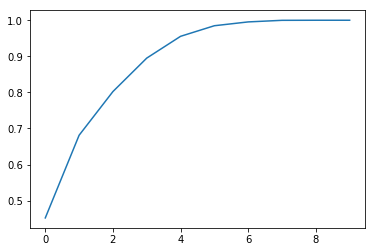

In [94]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [95]:
# There is two much data to work with here. Therefore we are going to examine the entire time series and attempt to summarize it

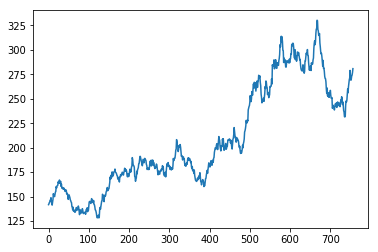

In [96]:
plt.plot(prices[:,0])

In [101]:
features['names']

['labour cost',
 'analyst projected total earnings',
 'weighted average outstanding shares',
 'R&D intensity index',
 'relative strength index',
 'total assets',
 'net book value',
 'analyst sentiment',
 'market share',
 'Aggregate Capital Cost']

In [106]:
features['values'].shape

(756, 680, 10)

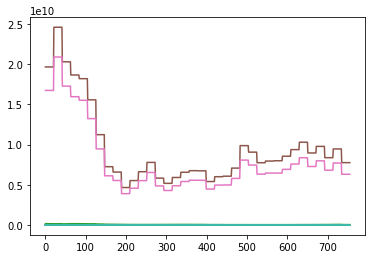

In [108]:
plt.plot(features['values'][:,0,:])

In [109]:
features['values'][:,0,:].shape

(756, 10)

In [116]:
z_data = z_scaler.fit_transform(features['values'][:,0,:])

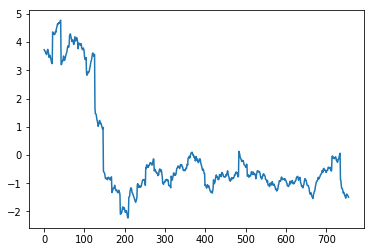

In [117]:
plt.plot(np.dot(z_data,pca.components_[0]))

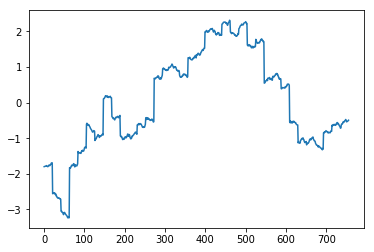

In [118]:
plt.plot(np.dot(z_data,pca.components_[1]))

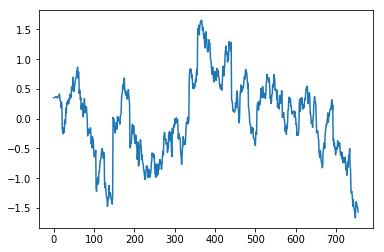

In [119]:
plt.plot(np.dot(z_data,pca.components_[2]))

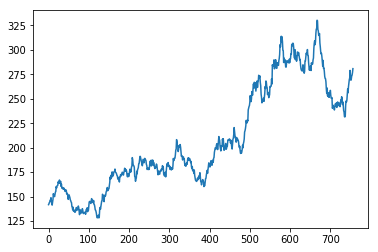

In [121]:
plt.plot(prices[:,0])